### Twitter API --> SQL Table

Setting up a data pipeline with MySQL 

In [ ]:
### 1. Create a class inheriting from StreamListener.

In [22]:
import mysql.connector
from mysql.connector import Error
import tweepy
import json
from dateutil import parser
import time


consumer_key = '0VScgPW7Aq4aRex3WnXFaOyKf'
consumer_secret = 'U4USFeqceE5ADEG6p3HCcJUBrtD7oMAwkbaDopaowlTzC2PiGR'
access_token = '1267949390968303616-3KS0ZIgno4eUlk6XlzvnZezwH0PDKM'
access_token_secret = 'cFuDgQPB00uZjVQ6ou5ePB2OLntZoeYeXZeGNJCCnbrYE'

password = 'password'

def connect(username, created_at, tweet, retweet_count, place , location):
    """
    connect to MySQL database and insert twitter data
    """
    try:
        con = mysql.connector.connect(host = 'localhost',
        database='twitterdb', user='root', password = password, charset = 'utf8')


        if con.is_connected():
            """
            Insert twitter data
            """
            print("Connected!!")
            cursor = con.cursor()
            # twitter, golf
            query = "INSERT INTO tweets (username, created_at, tweet, retweet_count,place, location) VALUES (%s, %s, %s, %s, %s, %s)"
            cursor.execute(query, (username, created_at, tweet, retweet_count, place, location))
            con.commit()


    except Error as e:
        print(e)

    cursor.close()
    con.close()

    return


# Tweepy class to access Twitter API
class Streamlistener(tweepy.StreamListener):


    def on_connect(self):
        print("You are connected to the Twitter API")


    def on_error(self):
        if status_code != 200:
            print("error found")
            # returning false disconnects the stream
            return False

    """
    This method reads in tweet data as Json
    and extracts the data we want.
    """
    def on_data(self,data):

        try:
            raw_data = json.loads(data)

            if 'text' in raw_data:

                username = raw_data['user']['screen_name']
                created_at = parser.parse(raw_data['created_at'])
                tweet = raw_data['text']
                retweet_count = raw_data['retweet_count']

                if raw_data['place'] is not None:
                    place = raw_data['place']['country']
                    print(place)
                else:
                    place = None


                location = raw_data['user']['location']

                #insert data just collected into MySQL database
                connect(username, created_at, tweet, retweet_count, place, location)
                print("Tweet colleted at: {} ".format(str(created_at)))
        except Error as e:
            print(e)


if __name__== '__main__':
    
    """
    # # #Allow user input
    track = []
    while True:

        input1  = input("what do you want to collect tweets on?: ")
        track.append(input1)

        input2 = input("Do you wish to enter another word? y/n ")
        if input2 == 'n' or input2 == 'N':

            break

        print("You want to search for {}".format(track))
        print("Initialising Connection to Twitter API....")
        time.sleep(2)
    """

    # authentification so we can access twitter
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api =tweepy.API(auth, wait_on_rate_limit=True)

    # create instance of Streamlistener
    listener = Streamlistener(api = api)
    stream = tweepy.Stream(auth, listener = listener)

    track = ['NBA', 'Lebron', 'Jordan', 'Lakers']
    #track = ['nba', 'cavs', 'celtics', 'basketball']
    # choose what we want to filter by
    stream.filter(track = track, languages = ['en'])

You are connected to the Twitter API
Connected!!
Tweet colleted at: 2021-04-27 12:35:03+00:00 
Connected!!
Tweet colleted at: 2021-04-27 12:35:04+00:00 
Connected!!
Tweet colleted at: 2021-04-27 12:35:04+00:00 
Connected!!
Tweet colleted at: 2021-04-27 12:35:05+00:00 
Connected!!
Tweet colleted at: 2021-04-27 12:35:07+00:00 
Connected!!
1366 (HY000): Incorrect string value: '\xF0\x9F\x98\x8E\x0AT...' for column 'tweet' at row 1
Tweet colleted at: 2021-04-27 12:35:08+00:00 
Connected!!
Tweet colleted at: 2021-04-27 12:35:09+00:00 
Connected!!
Tweet colleted at: 2021-04-27 12:35:10+00:00 
Connected!!
Tweet colleted at: 2021-04-27 12:35:10+00:00 
Connected!!
Tweet colleted at: 2021-04-27 12:35:10+00:00 
Connected!!
Tweet colleted at: 2021-04-27 12:35:11+00:00 
Connected!!
Tweet colleted at: 2021-04-27 12:35:11+00:00 
Connected!!
Tweet colleted at: 2021-04-27 12:35:13+00:00 
Connected!!
Tweet colleted at: 2021-04-27 12:35:13+00:00 
Connected!!
Tweet colleted at: 2021-04-27 12:35:14+00:00 


Connected!!
1366 (HY000): Incorrect string value: '\xF0\x9F\x8F\x80 \x0A...' for column 'tweet' at row 1
Tweet colleted at: 2021-04-27 12:36:09+00:00 
Connected!!
Tweet colleted at: 2021-04-27 12:36:10+00:00 


KeyboardInterrupt: 

### Part 2: Building an ETL Pipeline in Python

* how we can access this data and do some analysis with it
*I plan to extract the raw data from our database, clean it and finally do some simple analysis using word clouds and an NLP Python library.

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/devinpowers/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Successfully connected to database


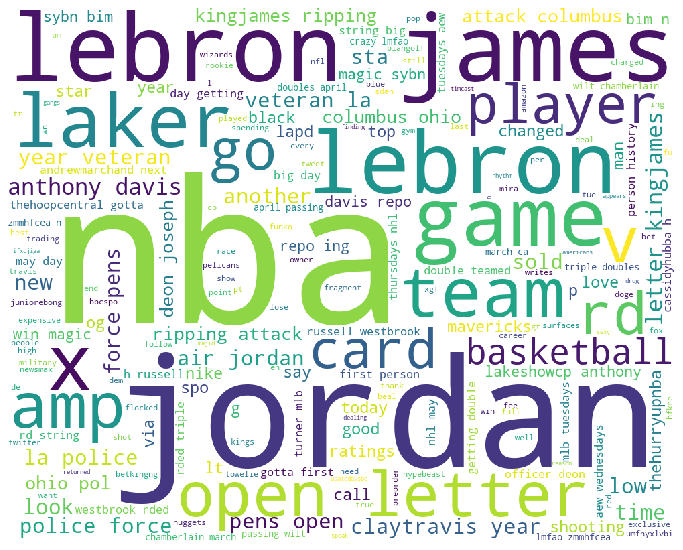



csv successfully saved. 

percentage of positive tweets: 35.0%
percentage of negative tweets: 20.0%
percentage of neutral tweets: 45.0%


In [23]:
import mysql.connector 
from mysql.connector import Error
import os
import re
import pandas as pd 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')

from wordcloud import WordCloud, STOPWORDS
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob


class TweetObject():


    def __init__(self, host, database, user):
        self.password = 'password'
        self.host = host
        self.database = database
        self.user = user



    def MySQLConnect(self,query):
        """
        Connects to database and extracts
        raw tweets and any other columns we
        need
        Parameters:
        ----------------
        arg1: string: SQL query
        Returns: Pandas Dataframe
        ----------------
        """

        try:
            con = mysql.connector.connect(host = self.host, database = self.database, \
                user = self.user, password = self.password, charset = 'utf8')

            if con.is_connected():
                print("Successfully connected to database")

                cursor = con.cursor()
                query = query
                cursor.execute(query)

                data = cursor.fetchall()
                # store in dataframe
                df = pd.DataFrame(data,columns = ['date', 'tweet'])



        except Error as e:
            print(e)

        cursor.close()
        con.close()

        return df



    def clean_tweets(self, df):

        """
        Takes raw tweets and cleans them
        so we can carry out analysis
        remove stopwords, punctuation,
        lower case, html, emoticons.
        This will be done using Regex
        ? means option so colou?r matches
        both color and colour.
        """

        # Do some text preprocessing
        stopword_list = stopwords.words('english')
        ps = PorterStemmer()
        df["clean_tweets"] = None
        df['len'] = None
        for i in range(0,len(df['tweet'])):
            # get rid of anythin that isnt a letter

            exclusion_list = ['[^a-zA-Z]','rt', 'http', 'co', 'RT']
            exclusions = '|'.join(exclusion_list)
            text = re.sub(exclusions, ' ' , df['tweet'][i])
            text = text.lower()
            words = text.split()
            words = [word for word in words if not word in stopword_list]
             # only use stem of word
            #words = [ps.stem(word) for word in words]
            df['clean_tweets'][i] = ' '.join(words)


        # Create column with data length
        df['len'] = np.array([len(tweet) for tweet in data["clean_tweets"]])



        return df



    def sentiment(self, tweet):
        """
        This function calculates sentiment
        on our cleaned tweets.
        Uses textblob to calculate polarity.
        Parameters:
        ----------------
        arg1: takes in a tweet (row of dataframe)
        """

        # need to improce
        analysis = TextBlob(tweet)
        if analysis.sentiment.polarity > 0:
            return 1
        elif analysis.sentiment.polarity == 0:
            return 0
        else:
            return -1




    def save_to_csv(self, df):
        """
        Save cleaned data to a csv for further
        analysis.
        Parameters:
        ----------------
        arg1: Pandas dataframe
        """
        try:
            df.to_csv("clean_tweets.csv")
            print("\n")
            print("csv successfully saved. \n")


        except Error as e:
            print(e)




    def word_cloud(self, df):
        plt.subplots(figsize = (12,10))
        wordcloud = WordCloud(
                background_color = 'white',
                width = 1000,
                height = 800).generate(" ".join(df['clean_tweets']))
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.show()





if __name__ == '__main__':
    

    t = TweetObject( host = 'localhost', database = 'twitterdb', user = 'root')

    data = t.MySQLConnect("SELECT created_at, tweet FROM `twitterdb`.`tweets`;")
    data = t.clean_tweets(data)
    data['Sentiment'] = np.array([t.sentiment(x) for x in data['clean_tweets']])
    t.word_cloud(data)
    t.save_to_csv(data)

    pos_tweets = [tweet for index, tweet in enumerate(data["clean_tweets"]) if data["Sentiment"][index] > 0]
    neg_tweets = [tweet for index, tweet in enumerate(data["clean_tweets"]) if data["Sentiment"][index] < 0]
    neu_tweets = [tweet for index, tweet in enumerate(data["clean_tweets"]) if data["Sentiment"][index] == 0]

    #Print results
    print("percentage of positive tweets: {}%".format(100*(len(pos_tweets)/len(data['clean_tweets']))))
    print("percentage of negative tweets: {}%".format(100*(len(neg_tweets)/len(data['clean_tweets']))))
    print("percentage of neutral tweets: {}%".format(100*(len(neu_tweets)/len(data['clean_tweets']))))
